In [48]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [49]:
# Step 2: Load Data
# Assuming the dataset is in CSV format
df = pd.read_csv('/content/student-por.csv')  # Or use 'student-mat.csv' for Math data

In [50]:
# Step 3: Exploratory Data Analysis (EDA)

# 3.1: Display first few rows to understand the structure of the data
df.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [51]:
# Load the dataset, specify the delimiter as ';' and ensure that quotes are handled
df = pd.read_csv("/content/student-por.csv", delimiter=";", quotechar='"')

# Display the first few rows of the dataframe to check the structure
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [52]:
# 3.2: Check the data types and for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [53]:
# 3.3: Basic statistics summary of numerical columns
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [54]:
# 3.4: Check for missing values
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


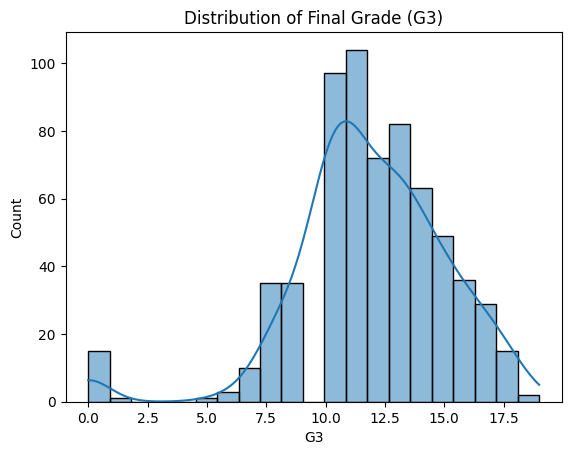

In [55]:
# 3.5: Visualizing the distribution of the target variable (G3)
sns.histplot(df['G3'], kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.show()

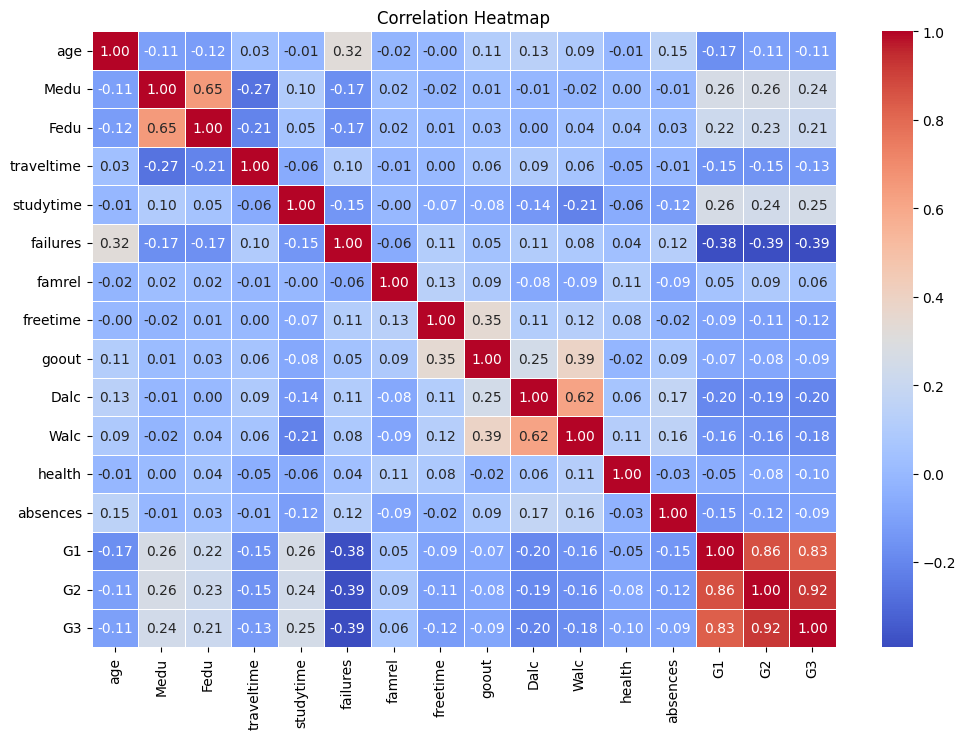

In [56]:
# 3.6: Visualizing correlations with a heatmap
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [57]:
# Step 4: Data Preprocessing

# 4.1: Convert categorical columns (sex, school, etc.) into numeric using pd.get_dummies()
df = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'activities', 'nursery', 'higher', 'internet', 'romantic'], drop_first=True)

In [58]:
# 4.2: Convert G1 and G2 to GPA (assuming 0-20 scale -> 0-5 GPA scale)
df['G1'] = df['G1'] / 4  # Convert to GPA out of 5
df['G2'] = df['G2'] / 4  # Convert to GPA out of 5
df['G3'] = df['G3'] / 4  # Convert to GPA out of 5

In [59]:
# 4.3: Feature Selection (Choose relevant features)
features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'freetime', 'goout', 'health']
X = df[features]  # Features (independent variables)
y = df['G3']  # Target (dependent variable)

In [60]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Step 6: Feature Scaling (Standardize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Step 7: Model Training (Random Forest Regressor)

# 7.1: Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# 7.2: Predict on test data
y_pred_rf = rf_model.predict(X_test_scaled)

In [64]:
# 7.3: Evaluate the model (Random Forest)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [65]:
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R2: {r2_rf}")

Random Forest MSE: 0.109778629553953
Random Forest RMSE: 0.3313285824584909
Random Forest R2: 0.8198821543688934


In [66]:
# Step 8: Model Training (Linear Regression for comparison)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [67]:
# 8.1: Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)

In [68]:
# 8.2: Evaluate the model (Linear Regression)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [69]:
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R2: {r2_lr}")

Linear Regression MSE: 0.08422042049538732
Linear Regression RMSE: 0.2902075472750275
Linear Regression R2: 0.861816450438383


In [70]:
# Step 9: Model Evaluation

# 9.1: Compare models based on R2 and RMSE
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'R2': [r2_rf, r2_lr],
    'RMSE': [rmse_rf, rmse_lr]
})

print(model_comparison)

               Model        R2      RMSE
0      Random Forest  0.819882  0.331329
1  Linear Regression  0.861816  0.290208


In [71]:
# Step 10: Cross-Validation (For better understanding of model performance)

# 10.1: Cross-validation scores for Random Forest
cv_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {-cv_rf.mean()}")

Random Forest Cross-Validation MSE: 0.10305871932903657


In [72]:
# Step 11: Hyperparameter Tuning (Optional)

# 11.1: Tuning Random Forest hyperparameters (you can explore GridSearchCV or RandomizedSearchCV here)

# Example of tuning with GridSearchCV (randomized search could also be used for more efficiency)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.09619882219606238


In [73]:
# Step 12: Final Model (Train with best parameters and evaluate)
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)
y_pred_final = best_rf_model.predict(X_test_scaled)

# 12.1: Evaluate the final model
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"Final Random Forest MSE: {mse_final}")
print(f"Final Random Forest RMSE: {rmse_final}")
print(f"Final Random Forest R2: {r2_final}")

Final Random Forest MSE: 0.09889530422566029
Final Random Forest RMSE: 0.3144762379348562
Final Random Forest R2: 0.8377388275611117


In [74]:
# Feature Importance: Check which features contributed the most to predictions:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

     Feature  Importance
1         G2    0.835432
4   absences    0.047102
0         G1    0.034401
5   freetime    0.027852
6      goout    0.020530
7     health    0.014679
2  studytime    0.011221
3   failures    0.008782


In [75]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual GPA': y_test.values,  # Actual GPA values
    'Predicted GPA': y_pred       # Model's predicted GPA values
})

# Display first 10 rows
print(comparison_df.head(10))

   Actual GPA  Predicted GPA
0        4.75       4.327500
1        3.00       2.855000
2        4.50       4.420000
3        2.75       2.790000
4        2.75       2.867500
5        4.25       4.080000
6        4.50       4.342500
7        2.00       2.302500
8        2.50       2.600417
9        2.75       2.651667


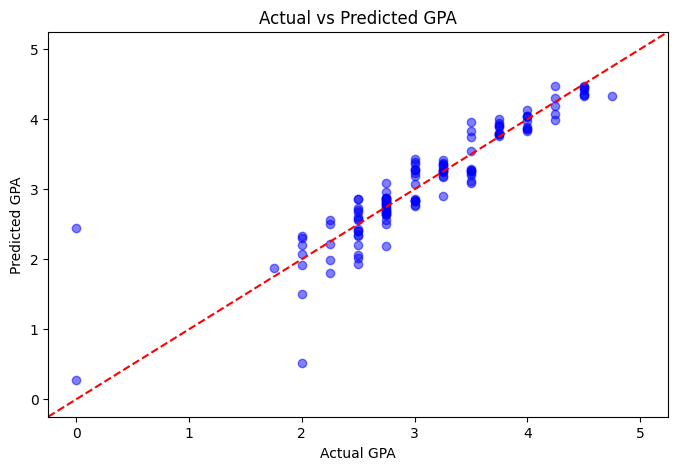

In [76]:
# Visualize Predictions: This scatter plot helps you see how well the predictions align with actual GPAs.

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA")
plt.axline([0, 0], [5, 5], color="red", linestyle="--")  # Perfect Prediction Line
plt.show()


In [84]:
# Function to get input from user and predict GPA
def predict_gpa():
    # Get input from the user
    print("Enter the following details:")

    G1 = float(input("Enter first semester GPA (0.0-5.0): "))
    G2 = float(input("Enter second semester GPA (0.0-5.0): "))
    studytime = int(input("Enter weekly study time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h): "))
    failures = int(input("Enter number of past failures (0-4): "))
    absences = int(input("Enter number of absences: "))
    freetime = int(input("How much free time do you have after school? (1-5): "))
    goout = int(input("How often do you go out with friends? (1-5): "))
    health = int(input("Enter current health status (1-5): "))

    # Create a dictionary with the user input values
    user_input = {
        'G1': [G1],
        'G2': [G2],
        'studytime': [studytime],
        'failures': [failures],
        'absences': [absences],
        'freetime': [freetime],
        'goout': [goout],
        'health': [health]
    }

    # Convert the input dictionary to a pandas DataFrame
    user_df = pd.DataFrame(user_input)

    # Assuming the scaler was already fitted on training data
    # Scale the input data using the same scaler
    user_scaled = scaler.transform(user_df)

    # Make the prediction using the trained model
    predicted_gpa = rf_model.predict(user_scaled)

    # Output the predicted GPA
    print(f"\n🎓 Predicted Final GPA (on a 5.0 scale): {predicted_gpa[0]:.2f}")

# Call the function to predict GPA
predict_gpa()

Enter the following details:
Enter first semester GPA (0.0-5.0): 4.3
Enter second semester GPA (0.0-5.0): 4.5
Enter weekly study time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h): 2
Enter number of past failures (0-4): 0
Enter number of absences: 5
How much free time do you have after school? (1-5): 3
How often do you go out with friends? (1-5): 1
Enter current health status (1-5): 5

🎓 Predicted Final GPA (on a 5.0 scale): 4.35


In [ ]:
# Saving Artifacts: RF model and Scaler
# Save the trained Random Forest model
import joblib
joblib.dump(rf_model, 'artifacts/rf_model.pkl')

# Save the scaler
joblib.dump(scaler, 'artifacts/scaler.pkl')

['scaler.pkl']

In [86]:
# Load the Random Forest model
rf_model = joblib.load('rf_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

In [87]:
scaler

StandardScaler()